## TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS

## APS 2 : Aplicação do método de diferenças finitas

<p> Alunos(a): Bernardo Cunha Capoferri </p>
<p>  Guilherme Dantas Rameh </p>
<p>  Henrique Martinelli Frezzatti </p>
<p>  Lívia Sayuri Makuta </p>



<h4>DEFINIÇÃO DO PROBLEMA</h4>


A função deve receber: <br>
* Dados do material: densidade do material, calor específico, condutividade térmica. <br>
* Dados do ambiente: coeficiente de transferência por convecção, temperatura do fluido.<br>
* Dados do dissipador: temperatura da base, raio, comprimento. <br>
* Dados do modelo numérico: $\Delta\ x$, tempo total da simulação. <br>

A função deve retornar: Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado numérico. Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado analítico. Use legendas e indique as unidades usadas. 

<p> Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em
todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao
redor de uma seção como indica a Figura 1. </p> <br> <br>

<div align="center">
<img src="img_ex1_aps2.png" alt="Drawing" style="width: 500px;"/>
</div>

<br><br>

* $qx$ taxa de transferência de calor por condução em $x$.
* $qx+dx$ taxa de transferência de calor por condução em $x + dx$. 
* $dq_{conv}$ taxa de transferência de calor por convecção através da área superficial do elemento diferencial. 

Substituindo as equações de taxa $q_{x}$, $q_{x+dx}$ e $dq_{conv}$ podemos obter a forma geral da equação da energia para uma
superfície estendida, em regime transiente como mostrado na figura 2: 

<div align = "center">
<figure>
<img src="equation_1_aps2.png" alt="Drawing" style="width: 250px;"/>
<figcaption> Figura 2 - Forma geral da equação de energia para uma superfície estendida.</figcaption>
</figure>
</div>

Onde ${\alpha}$ é a difusividade do material, $A_{tr}$ é a área da seção transversal da aleta, $h$ é o coeficiente de transferência de calor por convecção, $k$ é a condutividade térmica do material da aleta e $P$ é o perímetro da seção da aleta.

<h4>ROTEIRO DE ATIVIDADES</h4>

<h5>Pergunta</h5>

**1)**  Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações. 


<h5> Resposta </h5>

Partindo da equação mostrada anteriormente na figura 2, substituímos os termos contínuos, isto é, as derivadas segunda e primeira por uma equação de diferença finita centrada e por uma equação de diferença progressiva, respectivamente. Ambas as equações foram vistas na aula 7.

Com essas mudanças feitas, isolamos a próxima temperatura no tempo, representada por $T_{i}^{l+1}$, para obter no fim um gráfico com os valores da temperatura ao longo do comprimento da aleta. Todos os passos dessa transformação podem ser vistos abaixo na figura 3:

<div align="center">
<figure>
<img src="equacoes_1_aps2.png" alt="Drawing" style="width: 550px;"/>
<figcaption> Figura 3 - Desenvolvimento da transformação feita na equação original para implementar a resolução do problema através de um método numérico.</figcaption>
</figure>
</div>

<h5>Pergunta</h5>

2. Apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) após obter o regime permanente. Use uma tolerância de $tol = 10^{-10}$. Considere que a aleta, de comprimento $𝐿 = 300mm$, densidade de $2700 \frac{kg}{m^3}$ , condutividade térmica de $180\frac{W}{mK}$ e calor específico $896\frac{J}{kgK}$, tem a temperatura especificada na extremidade de $𝑇(𝐿) = 25℃$. A aleta está em contato com uma base a $𝑇b = 100℃$ em um ambiente a $𝑇{\infty} = 50℃$ e $h = 50\frac{W}{m^{2}K}$. Para a condição de estabilidade do procedimento numérico use $\Delta𝑡 ≤ \frac{\Delta\ x^{2}}{\alpha \cdot(\frac{hP\Delta\ x^{2}}{k\ A_{tr}}) + 2}$



<h5>Resposta</h5>

Primeiro começamos definindo os parâmetros passados pelo exercício, e para isso também precisamos importar algumas bibliotecas. Essa etapa pode ser vista na célula abaixo:

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

# tolerância de erro:
tol = 1e-10

# Comprimento da aleta:
L = 300e-3 # [m]

# Raio da aleta:
r = 3e-3 # [m]

# Densidade da aleta:
rho = 2700 # [kg/ m^3]

# Condutividade térmica:
k = 180 # [W/(mK)]

# Calor específico:
cp = 896 # [J/(kgK)]

# Termo alfa:
alfa = k/(rho*cp)

# Temperatura especificada na extremidade:
T_L = 25 # 25 [ºC] 

# Temperatura da base:
T_b = 100 # 100 [ºC]

# Temperatura do ambiente/fluido:
T_inf = 50 # 50 [ºC]

# Coeficiente de convecção:
h = 50 # [W/(m^2K)]

# Variação em x:
delta_x = 1e-3    # [m]

#Tempo total da simulação
t_total = 10000 # [s]



Observação: definimos o raio da aleta como $10^{-3}$ metros pois não foi dado pelo exercício e é um valor extremamente pequeno se comparado com o comprimento da aleta, o que nos permite adotar uma resolução unidimensional. 

Assim, com todos os parâmetros definidos, montamos uma função chamada **calculo_T_numerico** que recebe como entrada o delta x (intervalo adotado entre a posição atual e a próxima posição no eixo x da aleta em metros), o raio $[m]$, o coeficiente de convecção térmica $[\frac{W}{m^{2}K}]$, a condutividade térmica $[\frac{W}{mK}]$, a temperatura da base $[℃]$, a temperatura do ambiente/fluido $[℃]$, o termo alfa (divisão de $k$ por densidade e calor específico) e o tempo total requerido pela simulação $[s]$ a fim de plotar o gráfico de temperatura $[℃]$ por posição $[m]$.

Primeiro começamos calculando o delta t, já que para manter a estabilidade esse intervalo de tempo deveria ser $≤\frac{\Delta\ x^{2}}{\alpha \cdot(\frac{hP\Delta\ x^{2}}{k\ A_{tr}}) + 2}$. E para garantirmos isso, usamos 99% de $\frac{\Delta\ x^{2}}{\alpha \cdot(\frac{hP\Delta\ x^{2}}{k\ A_{tr}}) + 2}$ . Além disso, calculamos a área de transferência de calor e o perímetro da área de seção transversal da aleta. 

Feito isso, utilizamos o método das diferenças finitas que é um método aproximado para determinar a temperatura em pontos discretos (nodal) do sistema físico. Para isso começamos preenchendo uma matriz com zeros, sendo essa matriz determinada pelo número de pontos no tempo e número de pontos no eixo x (número total de todos os pequenos intervalos ao longo do comprimento da aleta). Após feito isso, definimos as condições de contorno que se resumem ao fato da temperatura da base ser a mesma e nunca mudar ( = $100 ℃$), e também ao fato da temperatura da extremidade da aleta ser a mesma ao longo do tempo ( = $25 ℃$).

Depois, para calcular a temperatura em cada um dos pontos selecionados no comprimento da aleta, utilizamos a equação descrita na figura 2 e fomos adicionando essas temperaturas em uma lista. Com a lista de todos os pontos ao longo do comprimento da aleta e das temperaturas associadas a cada um desses pontos, foi possível então plotar o gráfico da temperatura [℃] ao longo do comprimento da aleta [m] e isso tudo ao longo do tempo - que utilizamos 1000 segundos. 


In [2]:
def calculo_T_numerico(delta_x, r, h, k, T_extremidade, T_b, Tinf, alfa, t_total, tol):
    lista_erro = []
    # Cálculo da área de transferência de calor na aleta.
    Atr = pi*(r**2)
    
    # Cálculo do perímetro da área de seção transversal da aleta.
    P = 2*pi*r
    
    # Cálculo do delta t a fim de manter a estabilidade.
    den_delta_t = ((h*P*(delta_x**2))/(k*Atr))+2
    delta_t = ((delta_x**2)/ (alfa*den_delta_t))*0.99

    # Número de passos no tempo, isto é, tempo total dividido por delta x. 
    n_tempo =  len(np.arange(0, t_total, delta_t)) 
    
    # Número de pontos ao longo do comprimento da aleta.
    n_x = int(L/delta_x) + 1   


    # Montando a matriz de zeros:
    TM = np.zeros((n_tempo, n_x))
    
    # Condições de contorno:
    # Temperatura na base ao longo do tempo é a mesma.
    TM[:, 0] = T_b
    
    # Temperatura na extremidade ao longo do tempo é a mesma. 
    TM[:, n_x-1] = T_extremidade  

    tempo_tol_atingida = 0
    for l in range(0, n_tempo-1):
        for i in range(1, n_x-1):
            termo1 = (TM[l, i+1] - 2*TM[l,i] + TM[l, i-1])/(delta_x**2)
            termo2 = (h*P*(TM[l,i]-T_inf))/(k*Atr)
            TM[l+1, i] = (TM[l,i] + alfa*delta_t*(termo1 - termo2)) 
            
        erro_final = np.amax(abs((TM[l+1, 1:-1]-TM[l, 1:-1])/TM[l+1, 1:-1]))
        lista_erro.append(erro_final)

        if tol >= erro_final:
            print('\n\nConvergiu!', l)
            tempo_tol_atingida = l
            
            break

    instante = n_tempo 
    x = np.linspace(0.0, L, n_x)
    T = np.array(TM[tempo_tol_atingida, :])

    plt.plot(x, T, color="darkcyan")
    plt.title("Gráfico de temperatura por comprimento")
    plt.xlabel("Valores de x [m]")
    plt.ylabel("Valores de temperatura [C]")
    plt.grid()
    plt.show()
    
    



Convergiu! 99289


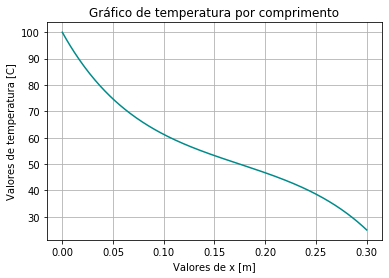

In [3]:
calculo_T_numerico(delta_x, r, h, k, T_L, T_b, T_inf, alfa, t_total, tol)

<h5> Pergunta </h5>

3) Para validar os resultados obtidos com o software desenvolvido, apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) para o comportamento analítico da temperatura na aleta usando as mesmas condições definidas no item anterior. 

<h5> Resposta </h5>

Para montar um gráfico que mostra o comportamento analítico da temperatura na aleta, começamos analisando qual seria o caso que representa melhor a distribuição de temperatura no objeto estudado. De acordo com as condições de contorno que foram providas pelo exercício, o melhor caso seria o C, isto é, o caso em que a distribuição de temperatura e a transferência de calor através da aleta estão restringidos a uma temperatura especificada na extremidade da aleta. Isso porque foi definido que $T(L) = 25  ℃$ ao longo de todos os pontos no intervalo de tempo estabelecido.


Assim, usando a fórmula de distribuição de temperatura apresentada na aula 6  e manipulando-a a fim de calcular a temperatura para todos os pontos ao longo do comprimento da aleta, foi possível montar o gráfico pedido no exercício. A manipulação da fórmula encontra-se abaixo na figura 4:

<div align="center">
<figure>
<img src="eq3_aps2_certo.png" alt="Drawing" style="width: 550px;"/>
<figcaption align = "center"> Figura 4 - Manipulação da fórmula de distribuição de temperatura apresentada na aula 6.</figcaption>
</figure>
</div>

In [4]:
# Resolução analítica

def calculo_T_analitico(delta_x, r, h, k, T_L, T_b, T_inf, alfa, t_total):
    # Cálculo da área de transferência de calor na aleta.
    Atr = pi*(r**2)
    
    # Cálculo do perímetro da área de seção transversal da aleta.
    P = 2*pi*r
    
    # Cálculo do termo m  
    m = sqrt((h*P)/(k*Atr))
    
    # Cálculo do delta t a fim de manter a estabilidade.
    den_delta_t = ((h*P*(delta_x**2))/(k*Atr))+2
    delta_t = ((delta_x**2)/ (alfa*den_delta_t))*0.99

    # Número de passos no tempo, isto é, tempo total dividido por delta x. 
    n_passos =  len(np.arange(0, t_total, delta_t))
    
    # Número de pontos ao longo do comprimento da aleta.
    lista_x = np.linspace(0, L, n_passos)
    listaTemp = []
    
    # T[i] = ((((T[L] - T_inf)/(T_b - T_inf))*sinh(m*x) + sinh(m*(L-x)))/(sinh(m*L)))*(T_b - T_inf) + T_inf

    for x in lista_x:
        teta_l_teta_b = ((T_L - T_inf)/(T_b - T_inf))
        numerador = teta_l_teta_b*sinh(m*x) + sinh(m*(L-x))
        denominador = sinh(m*L)
        fracao = (numerador/denominador)*(T_b - T_inf) + T_inf
        listaTemp.append(fracao)


    plt.plot(lista_x, listaTemp, color="red")
    plt.title("Gráfico de T(x) por x")
    plt.xlabel("Valores de x [de 0 até L em metros]")
    plt.ylabel("Valores de T(x) em Celsius")
    plt.grid()






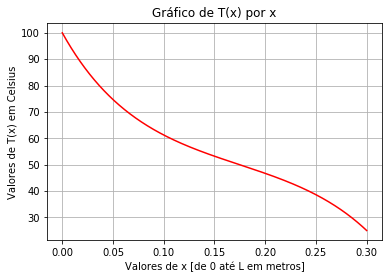

In [5]:
calculo_T_analitico(delta_x, r, h, k, T_L, T_b, T_inf, alfa, t_total)
